### Ejecta Modeling

See Kasen 2010, Botyanszki and Kasen 2017, Magee et al. 2018 


$$\rho (v) = \begin{cases}
\rho_{0} (\frac{v}{v_{t}})^{-\delta}; v \le v_{t} \\
\rho_{0} (\frac{v}{v_{t}})^{-n}; v \gt v_{t}
\end{cases}
$$

where $\rho_{0}$ is the central density of the density profile. $v_{t}$ is the transition velocity between a shallow core and steep outer layers. For a flat core profile ($\delta$ = 0). $\delta \lt$ 3 and $n \gt$ 3. 

$$\rho_{0} = \frac{M_{\rm ej}}{4 \pi (v_{\rm t} t_{\rm exp})^{3}} [ \frac{1}{3 - \delta} + \frac{1}{n - 3}]^{-1}$$

$$E_{K} = \frac{1}{2} M_{\rm ej} v_{t}^{2}[\frac{1}{5 - \delta} + \frac{1}{n - 5}] [\frac{1}{3 - \delta} + 
\frac{1}{n - 3}]^{-1}$$

where, $M_{\rm ej}$ is the ejected mass and $E_{\rm K}$ is the kinetic energy

In [18]:
file_path = '/Users/anirbandutta/Documents/SNEXP/TypeIa_Models/'

In [112]:
# imports
# This code will generate models to use with sedona and tardis
# Theoretical models are from https://hesma.h-its.org/doku.php
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%config InlineBackend.figure_formats = 'retina'

plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rc('font',family='Times New Roman')

In [38]:
class model_density:
    
    def __init__(self, file_name):
        
        '''
        file_name : Density file from HESMA database.
        2 columns: first column gives the velocity in km/s (specified at the centre of a radial shell), 
        second column gives density in g/cm^3. For models that leave a bound remnant, 
        the profile extends only over the ejecta. The density is computed as a spherical average over the 
        hydrodynamics data; thus, it is a good description for the density at the corresponding radius. 
        It may, however, be slightly inconsistent when integrating to obtain a mass.
        '''
        
        column_names = ['velocity', 'density']        # km/sec, gm/cm^3
        self.density_df = pd.read_csv(file_name, sep='\s+', names=column_names, engine='python', 
                                      comment='#', skiprows=1)
        
    def get_model(self):
        
        velocity = np.array(self.density_df['velocity'])
        density = np.array(self.density_df['density'])
        
        return velocity, density
            
            
    def plot_params(self, ax, ml_x, mil_x, ml_y, mil_y, invert=False):
    
        '''
        Remarks: Plotting parameters
        ax: axis object
        ml_x: major locator 'x'
        mil_x: minor locator 'x'
        ml_y: major locator 'y'
        mil_y: minor locator 'y'
        invert: Bool for the y-axis to be inverted 
    
        '''
    
        if invert:
            ax.invert_yaxis()
        
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 12, width = 2.0, labelsize = 12)
        ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 6, width = 1.2, labelsize = 12)
        ax.xaxis.set_major_locator(MultipleLocator(ml_x))
        ax.xaxis.set_minor_locator(MultipleLocator(mil_x))
        ax.yaxis.set_major_locator(MultipleLocator(ml_y))
        ax.yaxis.set_minor_locator(MultipleLocator(mil_y))
        
        
    def homologous_expansion(self, rho_ref, t_ref, t_exp):
        
        '''
        rho_ref : rho(v) at time explosion time t0.
        t_ref: reference explosion epoch in days.
        t_exp: time since explosion when density is being calculated in days.
        
        returns: rho
        '''
        
        rho = rho_ref * (t_ref / t_exp)**3
        
        return rho
    

    def uniform_density(self, rho_ref, t_ref, t_exp):
        
        '''
        rho_ref : rho(v) at time explosion time t0.
        t_ref: reference explosion epoch in days.
        t_exp: time since explosion when density is being calculated in days.
        
        returns: rho
        '''
        
        rho = rho_ref * (t_ref / t_exp)**3
        
        return rho
    
    
    def power_law(self, rho_0, t_ref, t_exp, v, v0, n=-2):
        
        '''
        rho_ref : rho(v) at time explosion time t0.
        t_ref: reference explosion epoch in days.
        t_exp: time since explosion when density is being calculated in days.
        v: velocity in km/s.
        v0: scale velocity in km/s.
        
        returns: rho
        '''
        
        rho_ref = rho_0 * (v / v0)**n
        
        rho = rho_ref * (t_ref / t_exp)**3
        
        return rho
    
    
    def exponential(self, rho_0, t_ref, t_exp, v, v0):
        
        '''
        rho_ref : rho(v) at time explosion time t0.
        t_ref: reference explosion epoch in days.
        t_exp: time since explosion when density is being calculated in days.
        
        returns: rho
        '''
        
        rho_ref = rho_0 * np.exp(- v / v0)
        
        rho = rho_ref * (t_ref / t)**3
        
        return rho
    
    
    def plot_model_density(self, model_name, log_axis=True):
        
        
        '''
        model_name: name of the model whose density profile is being plotted.
        
        '''
        
        fig_app = plt.figure(figsize = (5, 5), facecolor='white')
        ax = fig_app.add_subplot(111)
        plt.rcParams['axes.linewidth'] = 3
        self.plot_params(ax, ml_x = 5000, mil_x = 1000, ml_y = 1, mil_y = 0.1, invert=False)
        legend_properties = {'size':15, 'weight':'book'}
        ax.plot(self.density_df['velocity'], self.density_df['density'], 'r--', label=model_name)
        if log_axis:
            ax.set_yscale("log")
    
        ax.set_xlabel(r'$\rm Velocity\ [km/s]$', fontsize=20)
        ax.set_ylabel(r'$\rm Density\ [g/cm^{3}]$', fontsize=20)
        ax.legend(fontsize=12, borderaxespad=3)
        ax.set_title("Density vs Velocity", fontsize=20)
        
    
def broken_power_law(v, Mej, vt, texp, delta, n):
        
        '''
        
        v : velocity (in km/s)
        Mej : ejected mass (in solar mass)
        vt : transition velocity between an inner shallow core and steeply declining outer layers.
        texp : time since explosion ( in days).
        delta : slope of inner core.
        n : slope of outer core.
        
        delta < 3 and n > 3.
        
        '''
        
        _vt = vt * 10**5.          # cm/s
        _texp = texp * 86400       # s
        Msun = 1.9885 * 10**33     # g
        _v = v * 10**5.            # cm/s
        
        f = ((1 / (3 - delta)) + (1 / (n - 3)))
        rho_0 = Mej * Msun / (4 * np.pi * (_vt * _texp)**3 * f)    # gm/cm^3
        
        rho = np.zeros(len(_v))
        
        for i in range(len(_v)):
        
            if _v[i] <= _vt:
                rho[i] = rho_0 * (_v[i] / _vt)**(-delta) 
            elif _v[i] > _vt:
                rho[i] = rho_0 * (_v[i] / _vt)**(-n)
        
        return rho

### Violent merger density profile (Pakmor et al. 2012) 
#### Density profile at 100.07 sec since explosion

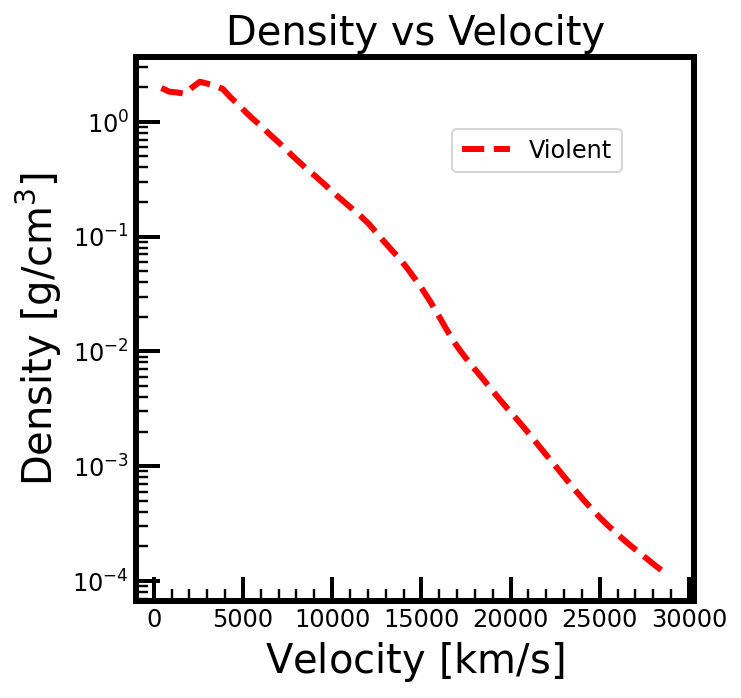

In [105]:
density_file = file_path + 'merger_2012_11_09_density.dat' 
density = model_density(density_file)
density.plot_model_density(model_name='Violent')

In [31]:
# Get velocity and density of merger scenario of 0.9 M and 1.1 M white dwarfs
vel_merger, den_merger = density.get_model()

### Rotating white dwarf density profile (Fink et al. 2018)
#### Density profile at 100.12 sec since explosion

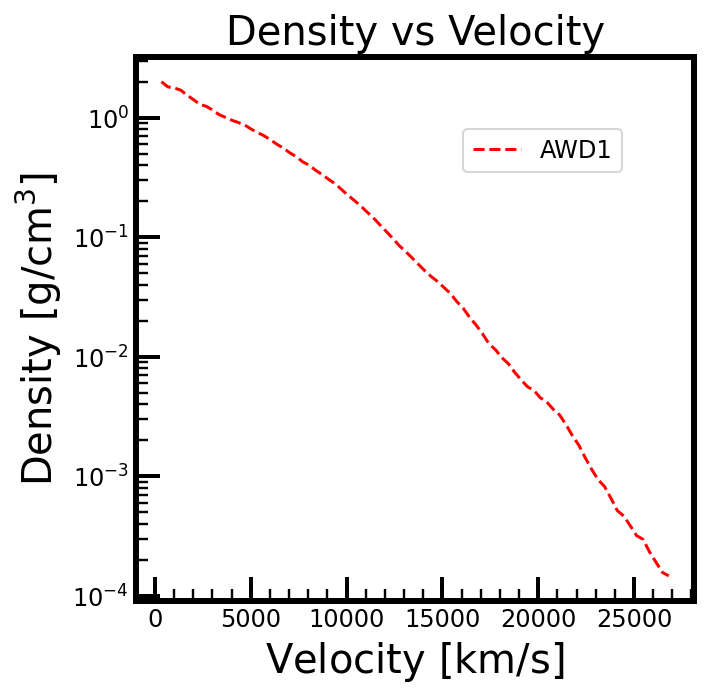

In [32]:
density_file_AWD1 = file_path + 'ddt_2010_awd1ddt_density.dat' 
density_AWD1 = model_density(density_file_AWD1)
density_AWD1.plot_model_density(model_name='AWD1')

In [33]:
# Get velocity and density of accreting white dwarf model
vel_AWD1, den_AWD1 = density_AWD1.get_model()

### Delayed detonation N10 (Sim et al. 2013, Seitenzahl et al. 2013)
#### Density profile at 100.13 sec since explosion

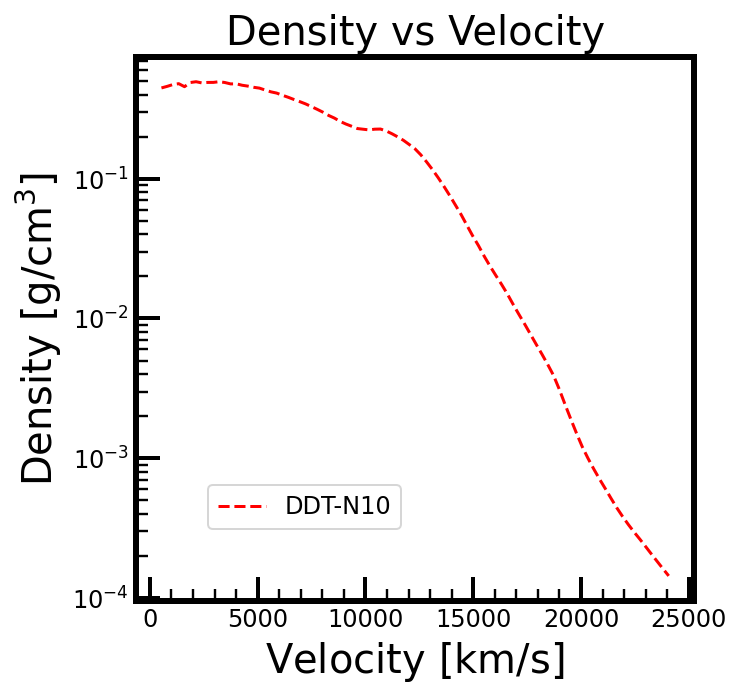

In [34]:
density_file_ddtN10 = file_path + 'ddt_2013_n10_density.dat' 
density_ddtN10 = model_density(density_file_ddtN10)
density_ddtN10.plot_model_density(model_name='DDT-N10')

In [35]:
# Get velocity and density of delayed detonation model N10
vel_N10, den_N10 = density_ddtN10.get_model()

### Delayed detonation N20 (Sim et al. 2013, Seitenzahl et al. 2013)
#### Density profile at 100.01 sec since explosion

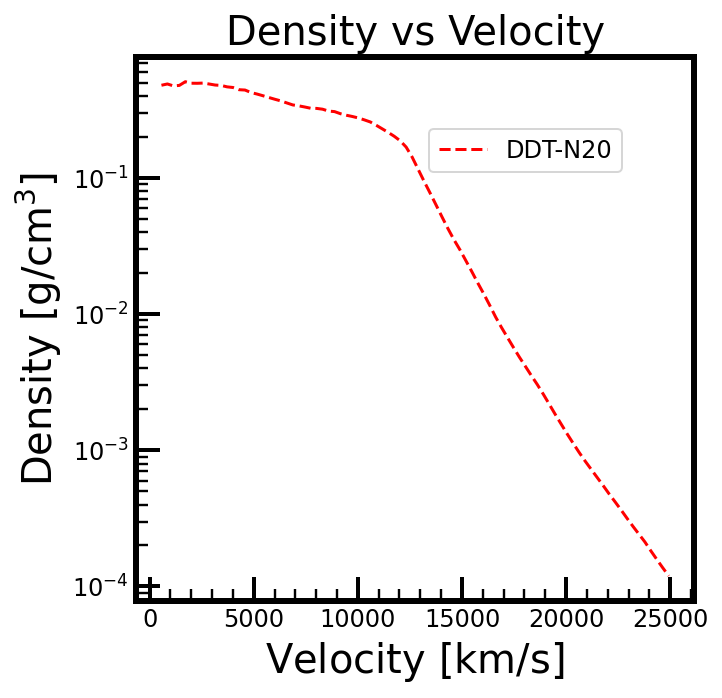

In [36]:
density_file_ddtN20 = file_path + 'ddt_2013_n20_density.dat' 
density_ddtN20 = model_density(density_file_ddtN20)
density_ddtN20.plot_model_density(model_name='DDT-N20')

In [37]:
# Get velocity and density of delayed detonation model N20
vel_N20, den_N20 = density_ddtN20.get_model()

In [99]:

v_model = np.linspace(100, 30000, 1000)  # km/s
Mej = 1.4                                # Msun
vt = 12000                               # km/s
texp = 100.0 / 86400                     # days
delta = [0, 1, 2]
n = [10, 11, 12]


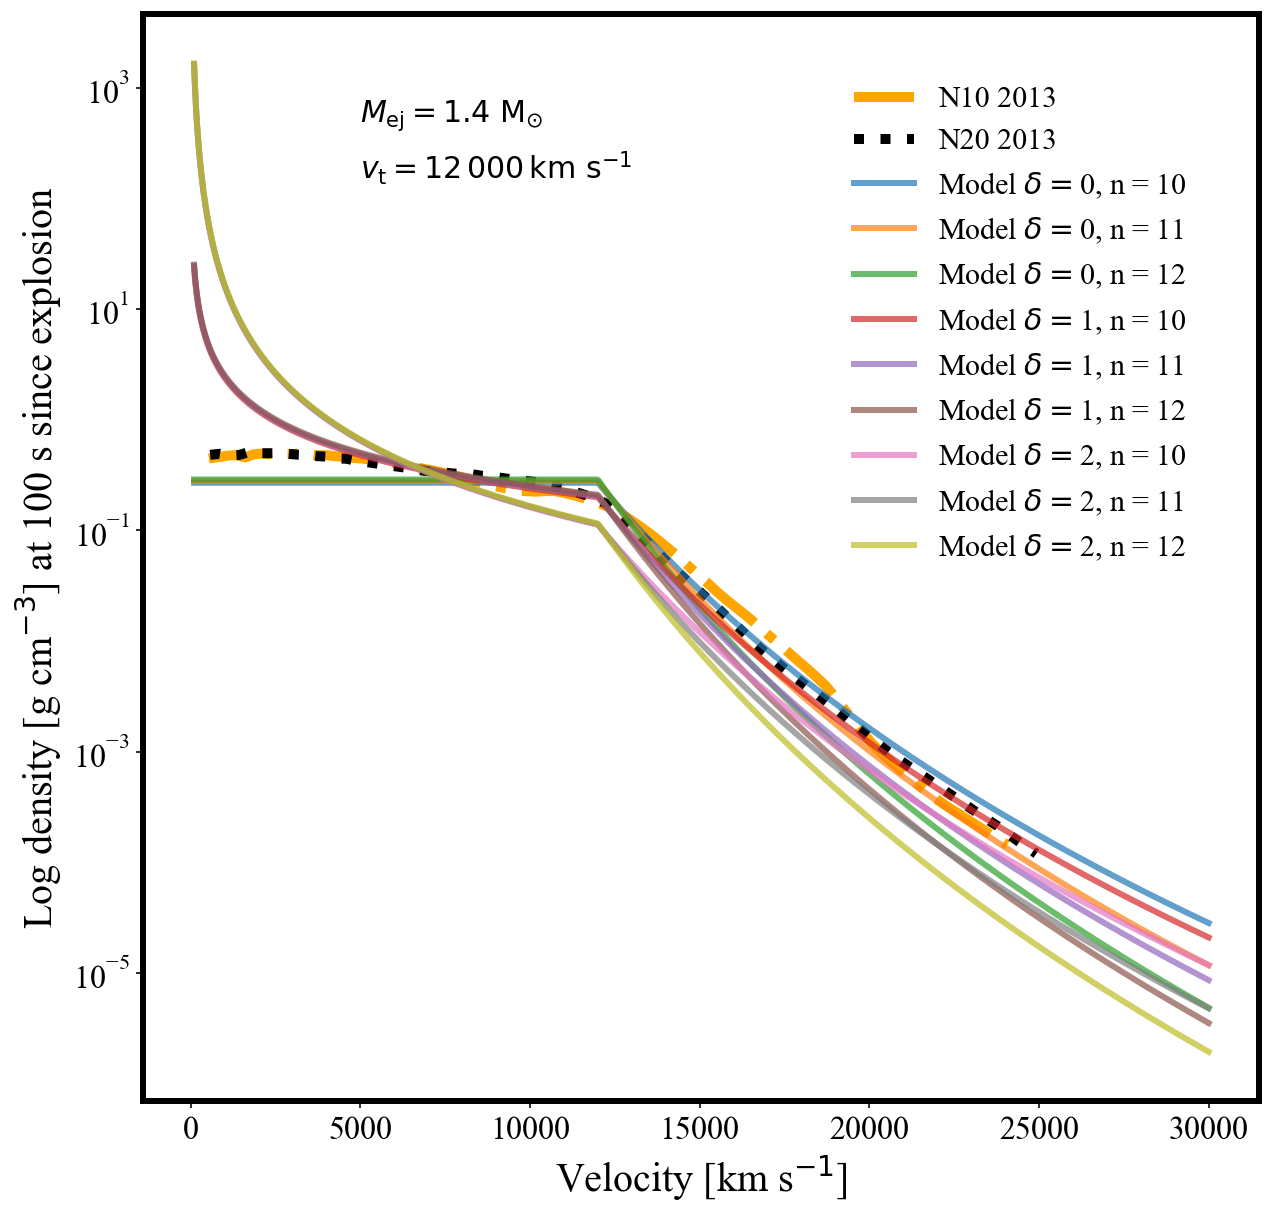

In [132]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

#ax.plot(vel_merger, den_merger, color='cyan', ls='-', lw=2.0, label='Merger 2012')
#ax.plot(vel_AWD1, den_AWD1, color='navy', ls='--', lw=2.0, label='AWD1 2018')
ax.plot(vel_N10, den_N10, color='orange', ls='-.', lw=5.0, label='N10 2013')
ax.plot(vel_N20, den_N20, color='black', ls=':', lw=5.0, label='N20 2013')

for i in range(len(delta)):
    for j in range(len(n)):
        rho_model = broken_power_law(v, Mej, vt, texp, delta[i], n[j])
        ax.plot(v_model, rho_model, label='Model ' + '$\delta = $'+ str(delta[i]) + ', ' + 'n = '+ str(n[j]),
               alpha=0.7)
    

ax.plot()
ax.legend(borderaxespad=2.0, fancybox=False, fontsize=15, frameon=False)
ax.set_yscale('log')
ax.set_ylabel('Log density [g cm$^{-3}$] at 100 s since explosion')
ax.set_xlabel('Velocity [km s$^{-1}$]')
ax.text(5000, 500, r'$M_{\rm ej} = 1.4~\rm M_{\odot}$', fontsize=15)
ax.text(5000, 150, r'$v_{\rm t} = 12\,000\, \rm km~s^{-1}$', fontsize=15)


plt.show();